In [1]:
import BrownsvilleAPI
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# Brownsville Analysis

This analysis uses the Brownsville API to perform a prelimanry analysis on the dataset. It explores the most common types of complaints over the years and identifies trends in the number of complaints reported over the years.

In [2]:
# brownsville = BrownsvilleAPI.Brownsville(force_load=True)
brownsville = BrownsvilleAPI.Brownsville()

Loading cached dataset...


In [10]:
brownsville.data.head()

,complaintid,buildingid,boroughid,borough,housenumber,streetname,zip,block,lot,apartment,...,minorcategoryid,codeid,statusdate,statusdescription,unittype,spacetype,type,code,majorcategory,minorcategory
0,7419264,311915,3,BROOKLYN,530,HERZL STREET,11212,3620,38,B6,...,348,2713,2015-04-07,The Department of Housing Preservation and Dev...,APARTMENT,ENTIRE APARTMENT,EMERGENCY,NO HEAT,HEAT/HOT WATER,APARTMENT ONLY
1,7419474,323973,3,BROOKLYN,385,LEGION STREET,11212,3595,18,1F,...,349,2715,2015-04-03,The Department of Housing Preservation and Dev...,BUILDING-WIDE,BUILDING-WIDE,EMERGENCY,NO HEAT,HEAT/HOT WATER,ENTIRE BUILDING
2,7419474,323973,3,BROOKLYN,385,LEGION STREET,11212,3595,18,1F,...,349,2717,2015-04-03,The Department of Housing Preservation and Dev...,BUILDING-WIDE,BUILDING-WIDE,EMERGENCY,NO HOT WATER,HEAT/HOT WATER,ENTIRE BUILDING
3,8320242,808361,3,BROOKLYN,1711,FULTON STREET,11233,1691,12,2N,...,333,2665,2017-01-05,The Department of Housing Preservation and Dev...,APARTMENT,ENTRANCE/FOYER,EMERGENCY,LOCK BROKEN OR MISSING,DOOR/WINDOW,DOOR
4,8320242,808361,3,BROOKLYN,1711,FULTON STREET,11233,1691,12,2N,...,381,2831,2017-01-05,The Department of Housing Preservation and Dev...,APARTMENT,KITCHEN,NON EMERGENCY,AT WALL OR CEILING,WATER LEAK,SLOW LEAK


## Building Coverage

In [3]:
print(f"Building coverage: {len(brownsville.buildings)}")

Building coverage: 2336


## Complaint types

In [4]:
building_common_complaints = []
for _id in brownsville.buildings:
    common_complaints = brownsville.get_feature_occurrences_by_building(
                                                            _id,
                                                            by=["majorcategory", "minorcategory"],
                                                            find_all=True)

    building_common_complaints.append((_id, common_complaints))
building_common_complaints.sort(key=lambda e: e[1].values.sum(), reverse=True)

In [5]:
for building in building_common_complaints[:10]:
    id_, complaints = building
    major_category, minor_category = complaints.index[0]
    num_complaints = complaints.values.sum()

    print("Building ID:", id_)
    print("Most common major category:", major_category)
    print("Most common minor category:", minor_category)
    print("Number of complaints:", num_complaints)

    print()

Building ID: 808361
Most common major category: HEAT/HOT WATER
Most common minor category: ENTIRE BUILDING
Number of complaints: 1167

Building ID: 362955
Most common major category: HEAT/HOT WATER
Most common minor category: ENTIRE BUILDING
Number of complaints: 177

Building ID: 309623
Most common major category: HEAT/HOT WATER
Most common minor category: ENTIRE BUILDING
Number of complaints: 177

Building ID: 363119
Most common major category: HEAT/HOT WATER
Most common minor category: ENTIRE BUILDING
Number of complaints: 159

Building ID: 362959
Most common major category: HEAT/HOT WATER
Most common minor category: APARTMENT ONLY
Number of complaints: 155

Building ID: 329071
Most common major category: UNSANITARY CONDITION
Most common minor category: PESTS
Number of complaints: 138

Building ID: 314098
Most common major category: HEAT/HOT WATER
Most common minor category: ENTIRE BUILDING
Number of complaints: 134

Building ID: 351727
Most common major category: HEAT/HOT WATER
Mos

## Complaints over time

<BarContainer object of 8 artists>

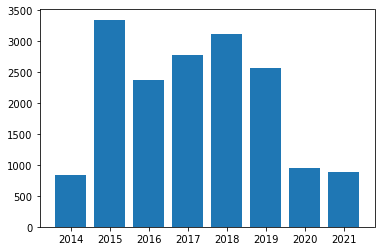

In [6]:
complaints_by_month = brownsville.records_by_date(period="year")
x, y = complaints_by_month.index, complaints_by_month.values
plt.bar(x, y)

Winter: 5876
Spring: 2792
Summer: 2437
Autumn: 5761


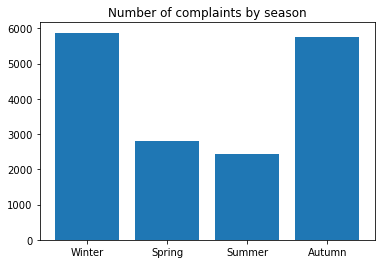

In [7]:
x, y = brownsville.records_by_season()
plt.bar(x, y)
plt.title("Number of complaints by season")
plt.show()

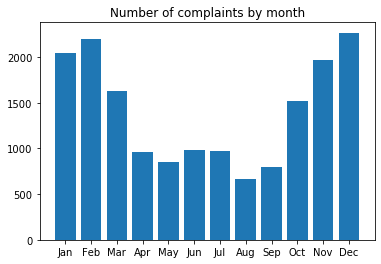

In [8]:
complaints_by_month = brownsville.records_by_date()
x, y = complaints_by_month.index, complaints_by_month.values
plt.bar(x, y)
plt.title("Number of complaints by month")
plt.show()

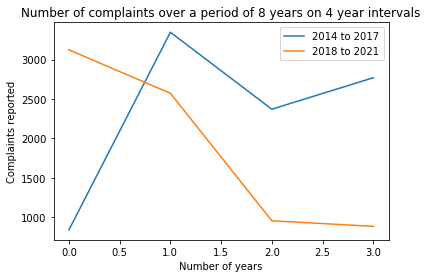

In [9]:
steps = 4
years = brownsville.records_by_date(period="year", num_years=8, step=steps)

for year in years:

    x = list(year.index.values)
    y = list(year.values)
    label = f"{year.index[0]} to {year.index[-1]}"

    plt.plot(np.arange(0, steps), y, label=label)
    
plt.xlabel("Number of years")
plt.ylabel("Complaints reported")
plt.title("Number of complaints over a period of 8 years on 4 year intervals")
plt.legend()
plt.show()